In [1]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Text(0, 0.5, 'Height')

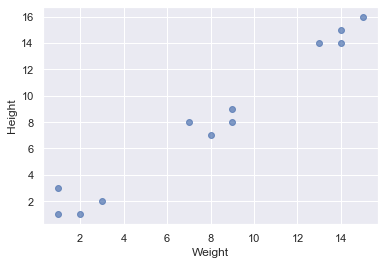

In [2]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

In [3]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [4]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 0 0 0 1 1 0 0 1 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 1]
 [0 0 0 0 1 1 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 1 0 0 1]
 [0 0 0 1 0 1 0 1 0 1]
 [0 0 1 0 0 0 1 0 0 1]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 0 0]]


C:\Users\Pradip\AppData\Local\Temp\ipykernel_948\1596649287.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G)


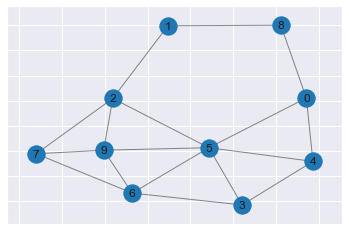

In [5]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [6]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('\nLaplacian matrix:')
print(L)

Degree matrix:
[[3 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 4]]

Laplacian matrix:
[[ 3  0  0  0 -1 -1  0  0 -1  0]
 [ 0  2 -1  0  0  0  0  0 -1  0]
 [ 0 -1  4  0  0 -1  0 -1  0 -1]
 [ 0  0  0  3 -1 -1 -1  0  0  0]
 [-1  0  0 -1  3 -1  0  0  0  0]
 [-1  0 -1 -1 -1  6 -1  0  0 -1]
 [ 0  0  0 -1  0 -1  4 -1  0 -1]
 [ 0  0 -1  0  0  0 -1  3  0 -1]
 [-1 -1  0  0  0  0  0  0  2  0]
 [ 0  0 -1  0  0 -1 -1 -1  0  4]]


In [7]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[7.265 0.000 0.879 1.305 5.651 2.551 3.101 4.725 4.114 4.409]
eigenvectors:
[[0.178 0.316 -0.178 0.412 -0.123 0.367 0.381 -0.258 0.243 0.496]
 [-0.049 0.316 -0.522 -0.353 -0.139 -0.584 0.131 0.158 -0.022 0.312]
 [0.280 0.316 0.039 -0.331 0.435 -0.072 0.321 -0.467 0.150 -0.416]
 [0.118 0.316 0.252 0.312 -0.295 -0.425 -0.496 -0.459 -0.027 -0.016]
 [0.134 0.316 0.103 0.496 0.100 -0.198 0.347 0.425 -0.440 -0.285]
 [-0.868 0.316 0.144 0.117 0.154 -0.031 0.079 -0.017 0.274 -0.079]
 [0.229 0.316 0.287 -0.084 0.530 0.038 -0.377 0.383 0.196 0.386]
 [-0.156 0.316 0.265 -0.397 -0.140 0.329 0.024 -0.157 -0.665 0.227]
 [-0.025 0.316 -0.625 0.086 0.072 0.394 -0.465 0.037 -0.105 -0.335]
 [0.158 0.316 0.236 -0.258 -0.592 0.182 0.053 0.354 0.395 -0.290]]


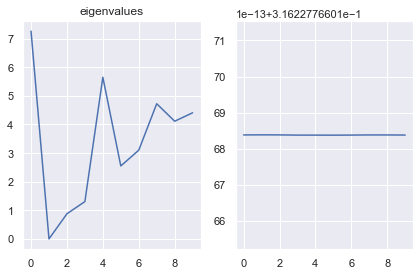

In [8]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


C:\Users\Pradip\AppData\Local\Temp\ipykernel_948\2735077428.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G)


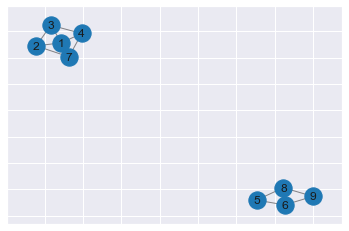

In [9]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [10]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('\nLaplacian matrix:')
print(L)

Degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]

Laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [11]:
e, v = np.linalg.eig(L)
# eigenvalues
print('Eigenvalues:')
print(e)
# eigenvectors
print('\nEigenvectors:')
print(v)

Eigenvalues:
[5.000 0.000 5.000 3.000 3.000 4.000 0.000 4.000 2.000]

Eigenvectors:
[[0.894 -0.447 0.077 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 0.707 0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 -0.000 -0.588 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 -0.707 -0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 0.000 0.588 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 0.052 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.425 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.798 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.425 0.707]]


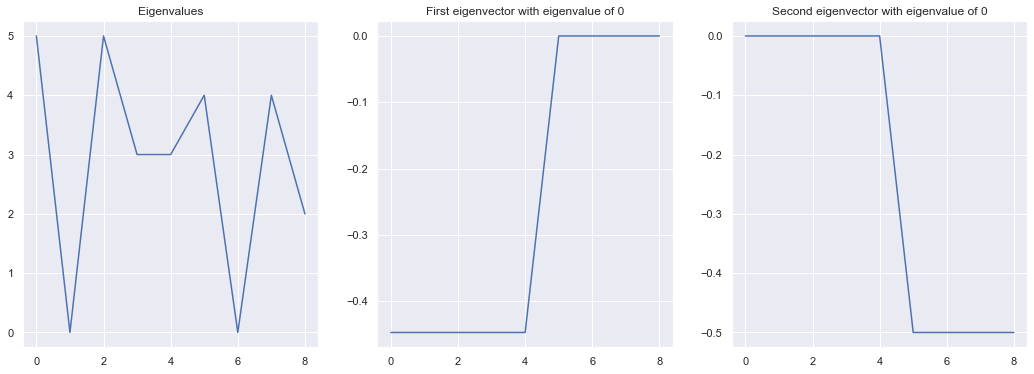

In [12]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('Eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax2.title.set_text('First eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('Second eigenvector with eigenvalue of 0')

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


C:\Users\Pradip\AppData\Local\Temp\ipykernel_948\162841250.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G)


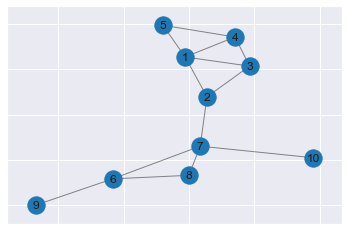

In [13]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [14]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('\nLaplacian matrix:')
print(L)

Degree matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]

Laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0]
 [ 0 -1  0  0  0 -1  4 -1  0 -1]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0]
 [ 0  0  0  0  0  0 -1  0  0  1]]


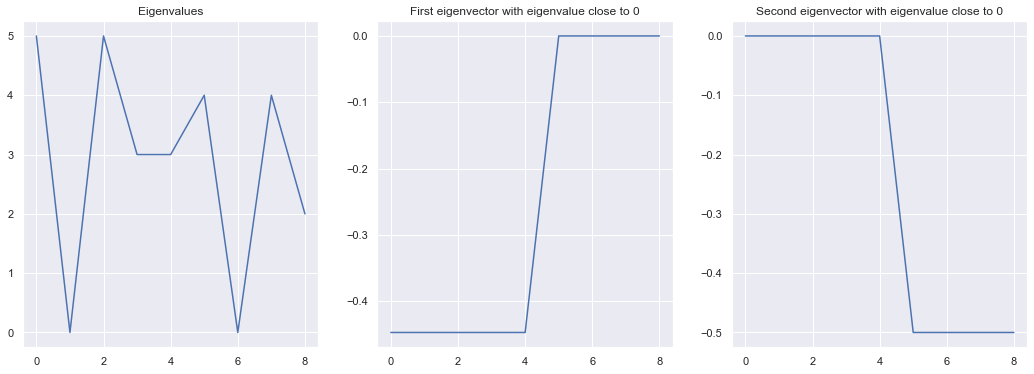

In [15]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('Eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax2.title.set_text('First eigenvector with eigenvalue close to 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('Second eigenvector with eigenvalue close to 0')

C:\Users\Pradip\AppData\Local\Temp\ipykernel_948\3742471109.py:22: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G)


[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


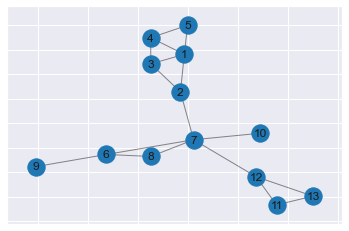

In [16]:
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [17]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('\nLaplacian matrix:')
print(L)

Degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]

Laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [18]:
e, v = np.linalg.eig(L)
# eigenvalues
print('Eigenvalues:')
print(e)
# eigenvectors
print('\nEigenvectors:')
print(v)

Eigenvalues:
[6.333 5.020 4.471 3.862 3.535 3.138 1.915 -0.000 0.184 0.348 0.772 1.421
 3.000]

Eigenvectors:
[[0.136 -0.867 0.086 -0.015 0.092 0.040 -0.079 -0.277 0.347 0.078 0.040
  -0.009 -0.000]
 [-0.312 0.253 0.318 -0.023 0.299 0.482 -0.527 -0.277 0.205 0.014 -0.054
  0.127 -0.000]
 [0.070 0.189 -0.667 -0.008 -0.073 -0.355 -0.434 -0.277 0.333 0.071 0.025
  0.035 0.000]
 [-0.056 0.231 0.577 0.044 -0.352 -0.473 0.135 -0.277 0.384 0.096 0.069
  -0.062 0.000]
 [-0.018 0.211 -0.269 -0.016 0.169 0.380 0.661 -0.277 0.403 0.106 0.089
  -0.124 -0.000]
 [-0.220 -0.077 -0.087 0.795 -0.122 0.025 0.077 -0.277 -0.152 -0.355
  0.113 0.214 0.000]
 [0.834 0.166 0.114 0.042 -0.179 0.248 -0.058 -0.277 -0.102 -0.113 -0.185
  0.174 -0.000]
 [-0.142 -0.029 -0.011 -0.450 0.196 -0.240 0.226 -0.277 -0.140 -0.284
  -0.059 0.670 -0.000]
 [0.041 0.019 0.025 -0.278 0.048 -0.012 -0.084 -0.277 -0.187 -0.545 0.495
  -0.507 0.000]
 [-0.156 -0.041 -0.033 -0.015 0.071 -0.116 0.063 -0.277 -0.125 -0.174
  -0.810 -0.4

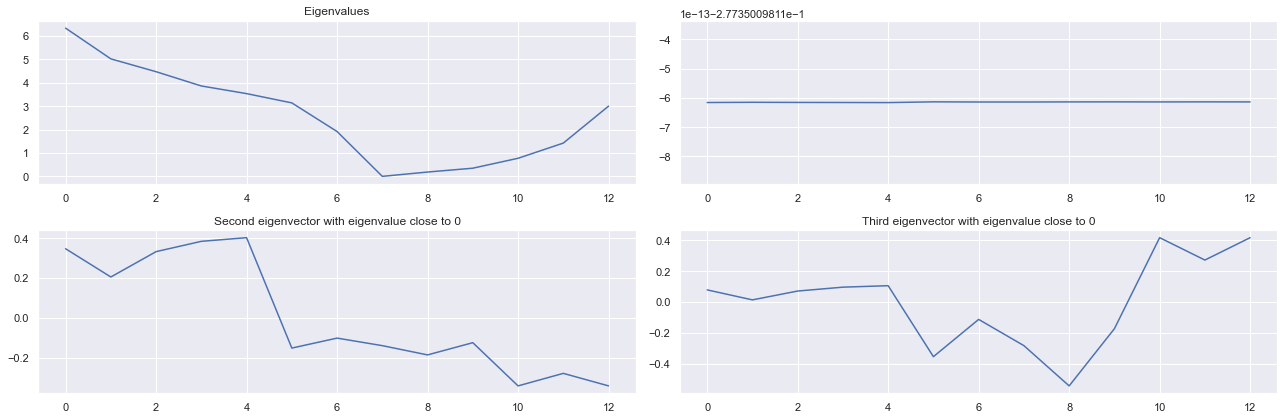

In [19]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('Eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('Second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('Third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [20]:
U = np.array(v[:, i[1]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2])

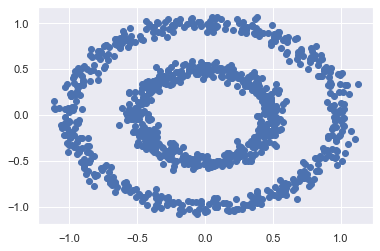

In [21]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

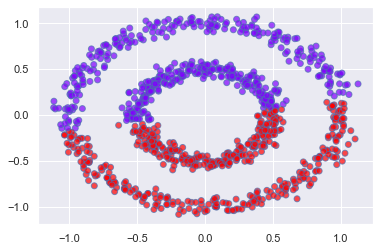

In [22]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


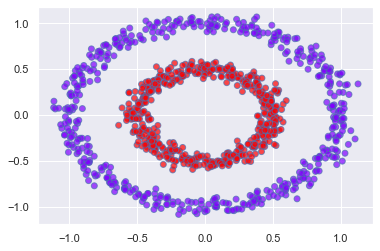

In [23]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')